In [21]:
# Question 1: Gaussian Discrmimant Analysis
!pip install -U pandas
!pip install -U numpy
!pip install -U plotly==5.10.0

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

x = np.loadtxt('../data/q4/q4x.dat')
y = np.loadtxt('../data/q4/q4y.dat', dtype=str)

y = np.reshape(y,(-1,1))
print(x,y)
# Num of examples
m = x.shape[0]

[[108. 368.]
 [131. 355.]
 [105. 469.]
 [ 86. 506.]
 [ 99. 402.]
 [ 87. 423.]
 [ 94. 440.]
 [117. 489.]
 [ 79. 432.]
 [ 99. 403.]
 [114. 428.]
 [123. 372.]
 [123. 372.]
 [109. 420.]
 [112. 394.]
 [104. 407.]
 [111. 422.]
 [126. 423.]
 [105. 434.]
 [119. 474.]
 [114. 396.]
 [100. 470.]
 [ 84. 399.]
 [102. 429.]
 [101. 469.]
 [ 85. 444.]
 [109. 397.]
 [106. 442.]
 [ 82. 431.]
 [118. 381.]
 [105. 388.]
 [121. 403.]
 [ 85. 451.]
 [ 83. 453.]
 [ 53. 427.]
 [ 95. 411.]
 [ 76. 442.]
 [ 95. 426.]
 [ 87. 402.]
 [ 70. 397.]
 [ 84. 511.]
 [ 91. 469.]
 [ 74. 451.]
 [101. 474.]
 [ 80. 398.]
 [ 95. 433.]
 [ 92. 404.]
 [ 99. 481.]
 [ 94. 491.]
 [ 87. 480.]
 [129. 420.]
 [148. 371.]
 [179. 407.]
 [152. 381.]
 [166. 377.]
 [124. 389.]
 [156. 419.]
 [131. 345.]
 [140. 362.]
 [144. 345.]
 [149. 393.]
 [108. 330.]
 [135. 355.]
 [170. 386.]
 [152. 301.]
 [153. 397.]
 [152. 301.]
 [136. 438.]
 [122. 306.]
 [148. 383.]
 [ 90. 385.]
 [145. 337.]
 [123. 364.]
 [145. 376.]
 [115. 354.]
 [134. 383.]
 [117. 355.]

In [22]:
# Normalize the data
x[:, 0] = (x[:, 0] - x[:, 0].mean()) / x[:, 0].std()
x[:, 1] = (x[:, 1] - x[:, 1].mean()) / x[:, 1].std()
print(x.mean(), x.std())

1.2878587085651815e-16 1.0


In [23]:
#GDA params
y[y=='Alaska']=0
y[y=='Canada']=1
phi = np.sum([y=='0'])/m

i_x0=[i for i in range(len(y)) if y[i]=='0']
i_x1=[i for i in range(len(y)) if y[i]=='1']
m_x0 = (np.mean(x[i_x0], axis=0)).reshape(1,-1)
m_x1 = (np.mean(x[i_x1], axis=0)).reshape(1,-1)


def covariance(x):
    c=np.zeros((2,2))
    c0=np.zeros((2,2))
    c1=np.zeros((2,2))
    m = len(x)
    c0 = np.cov(x[i_x0], rowvar=False)
    c1 = np.cov(x[i_x1], rowvar=False)
    c=(c0+c1)/m

    return c, c0, c1

cov, cov_0, cov_1 = covariance(x)
print(f"Phi of Alaska: {phi}", f"Mean of distribution of Alaska: {m_x0}", f"Mean of distribution Canada: {m_x1}", f"Covariance matrix: {cov}")



def prob_class(x, mu, cov):
    normal_distribution_prob = multivariate_normal(mean=mu, cov=cov)
    return np.log(phi) + normal_distribution_prob.logpdf(x)
    
def predict(x, m_x0, m_x1, cov_0, cov_1):
    y_pred = []
    for i in range(x.shape[0]):
        if prob_class(x[i:i+1], m_x0, cov_0) >= prob_class(x[i:i+1], m_x1, cov_1):
            y_pred = np.append(y_pred,"Alaska")
        else:
            y_pred = np.append(y_pred,"Canada")
    return y_pred

predictions = predict(x, m_x0.ravel(), m_x1.ravel(), cov_0, cov_1)
with open('results.txt', 'w+') as f:
    for item in predictions:
        f.write("%s\n" %item)
     
    print("File written successfully")


Phi of Alaska: 0.5 Mean of distribution of Alaska: [[-0.75529433  0.68509431]] Mean of distribution Canada: [[ 0.75529433 -0.68509431]] Covariance matrix: [[ 0.00876593 -0.00045862]
 [-0.00045862  0.01082951]]
File written successfully


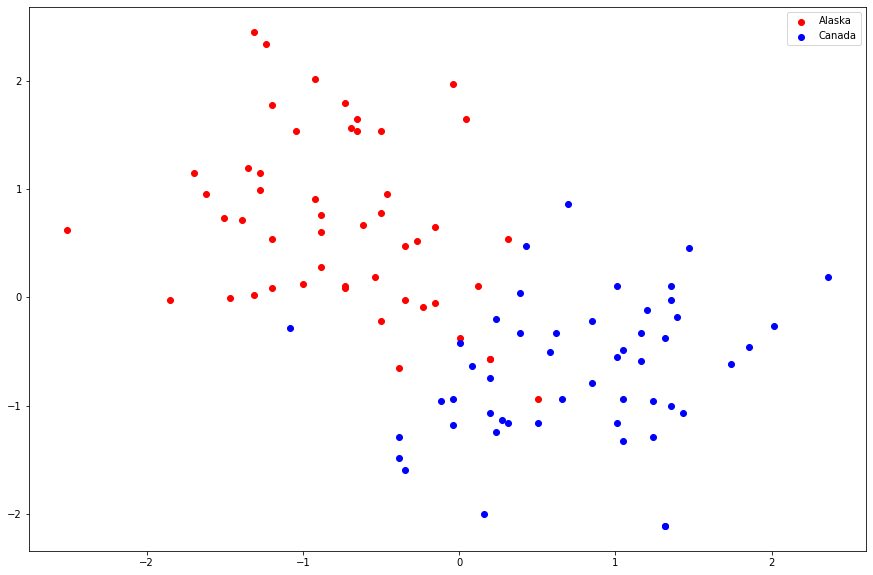

In [24]:
#Question 1.b - Plot the training data
fig = plt.figure(figsize=(15,10))
plt.scatter(x[i_x0][:,0], x[i_x0][:,1], c='r',label='Alaska')
plt.scatter(x[i_x1][:,0], x[i_x1][:,1], c='b',label='Canada')
plt.legend()
plt.savefig('q4_b.png', dpi=1000, bbox_inches='tight')
plt.show(block=False)

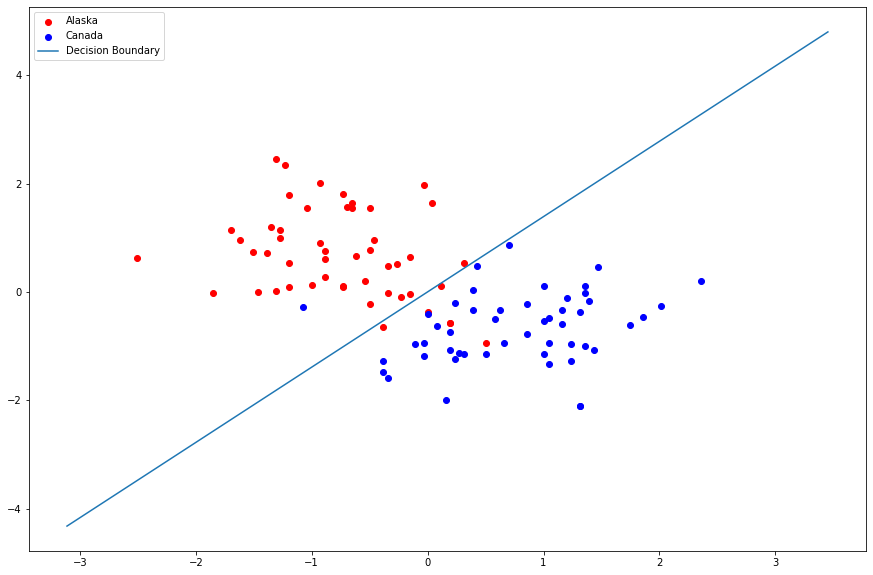

In [25]:
#Question 4.c - Describe the equation of the boundary

cov_i = np.linalg.pinv(cov)
a = (m_x1.dot(cov_i) - m_x0.dot(cov_i)).ravel()
b = np.log(phi/float(1-phi)) + 0.5*(np.dot(np.dot(m_x0,cov_i),m_x0.T) - np.dot(np.dot(m_x1,cov_i),m_x1.T))
x_vals = np.array([np.min(x[:, 1] - 1), np.max(x[:, 1] + 1)]).reshape(1,-1)
y_vals = -1*(b + a[0] * x_vals)/a[1]

fig = plt.figure(figsize=(15,10))
plt.scatter(x[i_x0][:,0], x[i_x0][:,1], c='r',label='Alaska')
plt.scatter(x[i_x1][:,0], x[i_x1][:,1], c='b',label='Canada')
plt.plot(x_vals.ravel(), y_vals.ravel(), label='Decision Boundary')
plt.legend()
plt.savefig('q4_c.png', dpi=1000, bbox_inches='tight')
plt.show(block=False)

In [26]:
# Question 4.d - Report the values of the parameter estimates
import math
x_vals, y_vals = x_vals.ravel(), y_vals.ravel()
x1 = np.linspace(x_vals[0], x_vals[1], 400)
x2 = np.linspace(y_vals[0], y_vals[1], 400)
x1, x2 = np.meshgrid(x1, x2)
cov0_i = np.linalg.inv(cov_0)
cov1_i = np.linalg.inv(cov_1)
a = (cov1_i - cov0_i)[0, 0]
b = (cov1_i - cov0_i)[1, 0] + (cov1_i - cov0_i)[0, 1]
c = (cov1_i - cov0_i)[1, 1]
d = 2*((np.dot(m_x0, cov0_i) - np.dot(m_x1, cov1_i)).ravel())[0]
e = 2*((np.dot(m_x0, cov0_i) - np.dot(m_x1, cov1_i)).ravel())[1]
f = np.dot(np.dot(m_x1, cov1_i), m_x1.T) - np.dot(np.dot(m_x0, cov0_i), m_x0.T) + 2 * \
    np.log((1-phi)/float(phi)) + \
    np.log(np.linalg.det(cov_1)/float(np.linalg.det(cov_0)))



print(f"Mean of distribution of Alaska: {m_x0} and covariance: {cov_0}")
print(f"Mean of distribution Canada: {m_x1} and covariance: {cov_1}")
print(f"Covariance matrix: {cov}")


Mean of distribution of Alaska: [[-0.75529433  0.68509431]] and covariance: [[ 0.38937733 -0.15802567]
 [-0.15802567  0.6609563 ]]
Mean of distribution Canada: [[ 0.75529433 -0.68509431]] and covariance: [[0.48721548 0.11216388]
 [0.11216388 0.4219943 ]]
Covariance matrix: [[ 0.00876593 -0.00045862]
 [-0.00045862  0.01082951]]


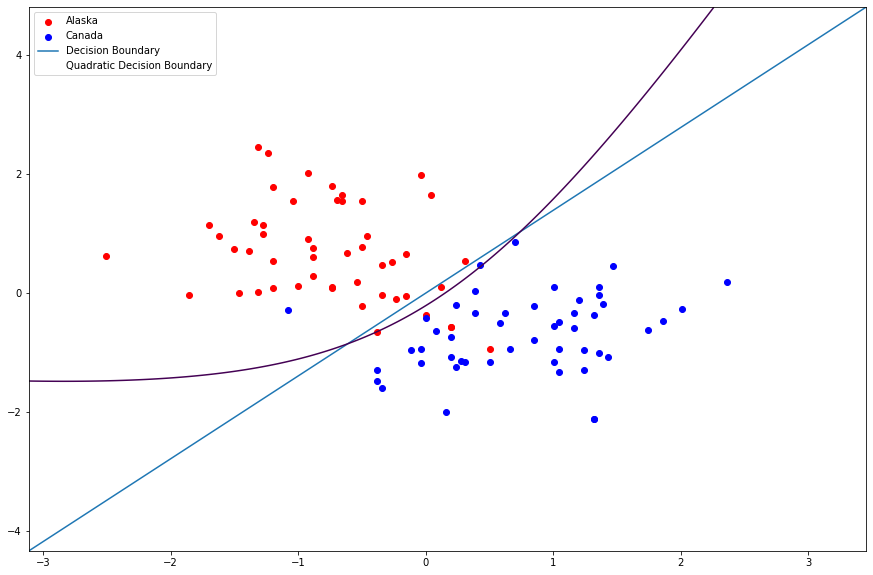

In [27]:
# Question 4.e - Describe the equation for the quadratic boundary

fig = plt.figure(figsize=(15,10))
plt.scatter(x[i_x0][:,0], x[i_x0][:,1], c='r',label='Alaska')
plt.scatter(x[i_x1][:,0], x[i_x1][:,1], c='b',label='Canada')
plt.plot(x_vals, y_vals,label='Decision Boundary')
c = plt.contour(x1, x2, (a*x1**2 + b*x1*x2 + c*x2 **
            2 + d*x1 + e*x2 + f), [0])
c.collections[0].set_label('Quadratic Decision Boundary')
plt.legend()
plt.savefig('q4_e.png', dpi=1000, bbox_inches='tight')
plt.show(block=False)